# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

/mnt/d/sinlhr/programming/python/assignment1/cs231n/features.py:121: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [17]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
log_lrs = np.log10(learning_rates)
log_regs = np.log10(regularization_strengths)
n = 10
for i in range(n):
    lr = 10 ** np.random.uniform(log_lrs[0], log_lrs[-1])
    reg = 10 ** np.random.uniform(log_regs[0], log_regs[-1])
    svm = LinearSVM()
    svm.train(X_train_feats, y_train, learning_rate = lr,reg = reg,num_iters = 1500, batch_size = 200, verbose = True)
    y_train_pred = svm.predict(X_train_feats)
    y_val_pred = svm.predict(X_val_feats)
    train_ac = np.mean(y_train == y_train_pred)
    val_ac = np.mean(y_val == y_val_pred)
    results.update(dict(zip([(lr, reg)], [(train_ac, val_ac)])))
    if val_ac > best_val:
        best_val = val_ac
        best_svm = svm
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 367.075508
iteration 100 / 1500: loss 321.907233
iteration 200 / 1500: loss 282.473563
iteration 300 / 1500: loss 247.963178
iteration 400 / 1500: loss 217.830699
iteration 500 / 1500: loss 191.499138
iteration 600 / 1500: loss 168.485044
iteration 700 / 1500: loss 148.364442
iteration 800 / 1500: loss 130.791849
iteration 900 / 1500: loss 115.431445
iteration 1000 / 1500: loss 102.007493
iteration 1100 / 1500: loss 90.283888
iteration 1200 / 1500: loss 80.032008
iteration 1300 / 1500: loss 71.070492
iteration 1400 / 1500: loss 63.243691
iteration 0 / 1500: loss 807.373651
iteration 100 / 1500: loss 9.977650
iteration 200 / 1500: loss 9.001152
iteration 300 / 1500: loss 8.999955
iteration 400 / 1500: loss 8.999960
iteration 500 / 1500: loss 8.999960
iteration 600 / 1500: loss 8.999964
iteration 700 / 1500: loss 8.999964
iteration 800 / 1500: loss 8.999965
iteration 900 / 1500: loss 8.999960
iteration 1000 / 1500: loss 8.999961
iteration 1100 / 1500: loss 8.9999

In [18]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.429


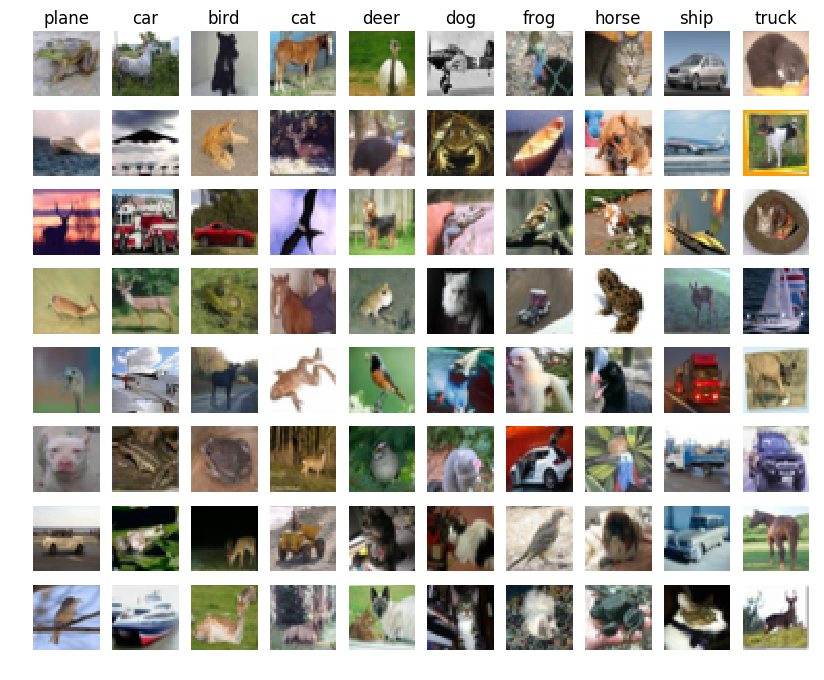

In [19]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
整体色调，形状与正确分类差异不大

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [28]:
print(X_train_feats.shape)

(49000, 155)


In [27]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1
learning_rates = [5e-2, 5e0]
regularization_strengths = [5e-6, 5e-3]
log_lrs = np.log10(learning_rates)
log_regs = np.log10(regularization_strengths)
n = 30
results = {}
for i in range(n):
    lr = 10 ** np.random.uniform(log_lrs[0], log_lrs[1])
    reg = 10 ** np.random.uniform(log_regs[0], log_regs[1])
    net = TwoLayerNet(X_train_feats.shape[1], hidden_dim, 10)
    net.train(X_train_feats, y_train, X_val_feats, y_val, learning_rate = lr, learning_rate_decay = 0.9, reg = reg, num_iters = 1500, batch_size = 200, verbose = True)
    y_train_pred = net.predict(X_train_feats)
    y_val_pred = net.predict(X_val_feats)
    train_ac = np.mean(y_train == y_train_pred)
    val_ac = np.mean(y_val == y_val_pred)
    results.update(dict(zip([(lr, reg)], [(train_ac, val_ac)])))
    if val_ac > best_val:
        best_val = val_ac
        best_net = net
        
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e hidden_size %d train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_dim, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.313500
iteration 200 / 1500: loss 1.583584
iteration 300 / 1500: loss 1.444589
iteration 400 / 1500: loss 1.619651
iteration 500 / 1500: loss 1.361063
iteration 600 / 1500: loss 1.283024
iteration 700 / 1500: loss 1.521954
iteration 800 / 1500: loss 1.325708
iteration 900 / 1500: loss 1.337755
iteration 1000 / 1500: loss 1.299686
iteration 1100 / 1500: loss 1.138796
iteration 1200 / 1500: loss 1.356775
iteration 1300 / 1500: loss 1.350741
iteration 1400 / 1500: loss 1.362797
iteration 0 / 1500: loss 2.302588
iteration 100 / 1500: loss 2.301754
iteration 200 / 1500: loss 2.097224
iteration 300 / 1500: loss 1.819505
iteration 400 / 1500: loss 1.520839
iteration 500 / 1500: loss 1.520738
iteration 600 / 1500: loss 1.442415
iteration 700 / 1500: loss 1.472994
iteration 800 / 1500: loss 1.508865
iteration 900 / 1500: loss 1.428252
iteration 1000 / 1500: loss 1.441338
iteration 1100 / 1500: loss 1.481422
iteration 1200 / 1500: lo

/mnt/d/sinlhr/programming/python/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: divide by zero encountered in log
  loss = - np.sum(np.log(escores[list(range(N)), y] / esums)) / N + (np.sum(W1 ** 2) + np.sum(W2 ** 2)) * reg


iteration 100 / 1500: loss 3.260055
iteration 200 / 1500: loss 2.806943
iteration 300 / 1500: loss 2.595586
iteration 400 / 1500: loss 2.001464
iteration 500 / 1500: loss 2.356842
iteration 600 / 1500: loss 1.974797
iteration 700 / 1500: loss 1.986954
iteration 800 / 1500: loss 1.730856
iteration 900 / 1500: loss 1.717675
iteration 1000 / 1500: loss 1.443462
iteration 1100 / 1500: loss 1.504510
iteration 1200 / 1500: loss 1.598353
iteration 1300 / 1500: loss 1.289593
iteration 1400 / 1500: loss 1.512189
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.693906
iteration 200 / 1500: loss 1.685356
iteration 300 / 1500: loss 1.624607
iteration 400 / 1500: loss 1.696290
iteration 500 / 1500: loss 1.700998
iteration 600 / 1500: loss 1.594490
iteration 700 / 1500: loss 1.551012
iteration 800 / 1500: loss 1.531733
iteration 900 / 1500: loss 1.761976
iteration 1000 / 1500: loss 1.641310
iteration 1100 / 1500: loss 1.495504
iteration 1200 / 1500: loss 1.668018
iteration 1300 / 1500:

In [29]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.552


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!